## Spaceship Titanic
https://www.kaggle.com/competitions/spaceship-titanic/overview

The [ref](https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#Libraries) helped a lot for making this notebook

#### Common order of analysis
1. Import libraries and data
1. Exploratory data analysis
1. Feature engineering
1. Missing value handling
1. drop features
1. log transform
1. encoding, scaling
1. PCA
1. train, valid set splitting

### Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
# sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px
import itertools
import warnings
warnings.filterwarnings(action='ignore')
import time
from tqdm import tqdm

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB



In [2]:
# import train_data
train_data = pd.read_csv('../data/Space Titanic/train.csv')
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# import test_data
test_data = pd.read_csv('../data/Space Titanic/test.csv')
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
# Is there any duplicates? Nope!
train_data.duplicated().sum(), test_data.duplicated().sum()

(0, 0)

### Exploratory Data Analysis

Text(0.5, 1.0, 'Target distribution')

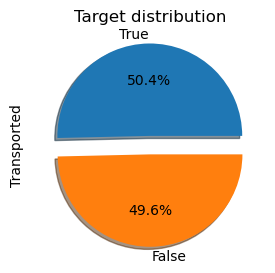

In [6]:
# Target distribution
plt.figure(figsize=(3, 3))
train_data['Transported'].value_counts().plot.pie(
    explode=[0.1, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    textprops={ 'fontsize': 10 },
).set_title('Target distribution')

Text(0.5, 0, 'Age (years)')

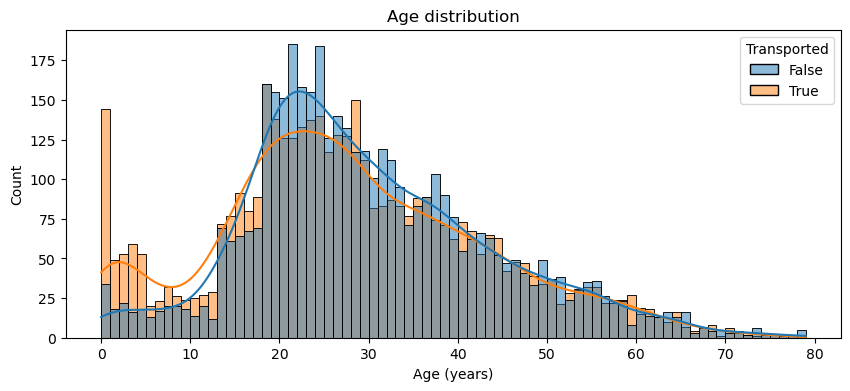

In [7]:
# Continuous features - Age
plt.figure(figsize=(10, 4))
sns.histplot(
    data=train_data,
    x='Age',
    hue='Transported',
    binwidth=1,
    kde=True
)
plt.title('Age distribution')
plt.xlabel('Age (years)')

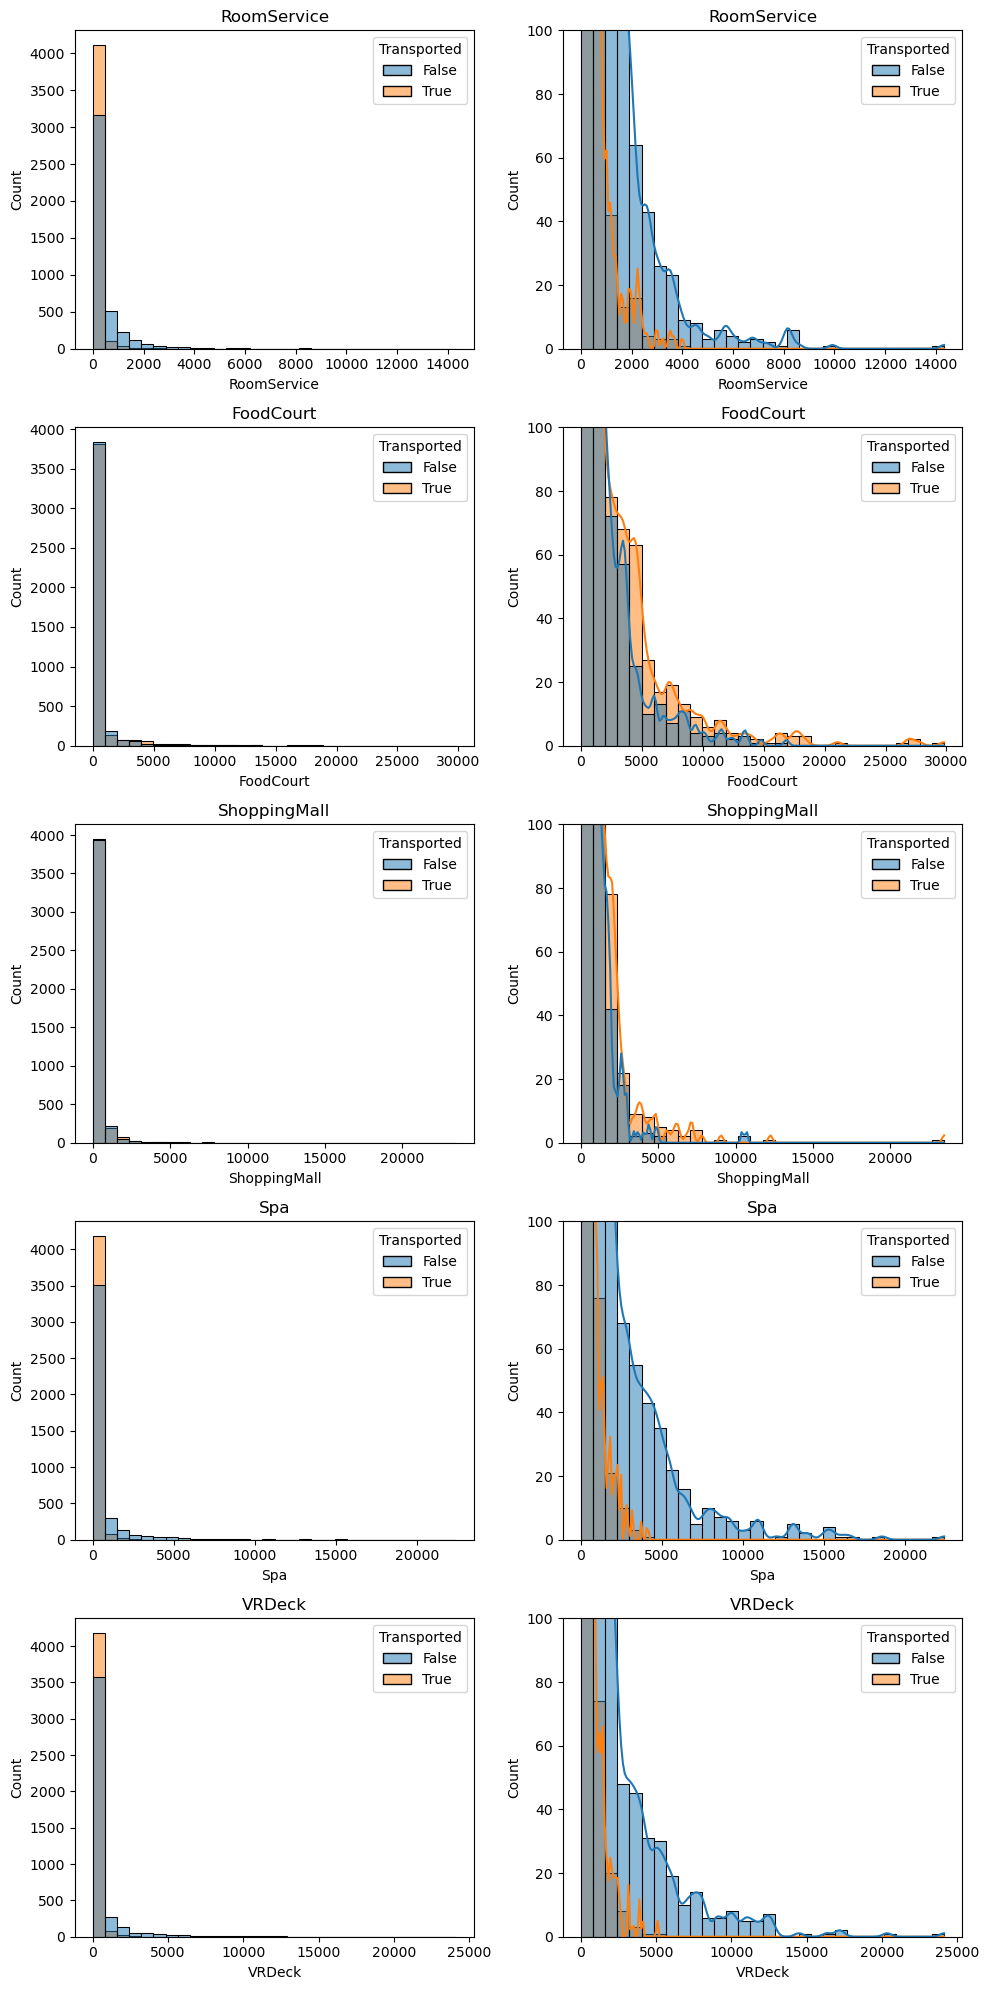

In [8]:
# Continuous features - Expenditures
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig = plt.figure(figsize=(10, 20))
for i, var_name in enumerate(exp_feats):
    ax = fig.add_subplot(len(exp_feats), 2, 2 * i + 1)
    sns.histplot(
        data=train_data,
        x=var_name,
        axes=ax,
        bins=30,
        kde=False,
        hue='Transported'
    )
    ax.set_title(var_name)

    ax = fig.add_subplot(len(exp_feats), 2, 2 * i + 2)
    sns.histplot(
        data=train_data,
        x=var_name,
        axes=ax,
        bins=30,
        kde=True,
        hue='Transported'
    )
    plt.ylim([0, 100])
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

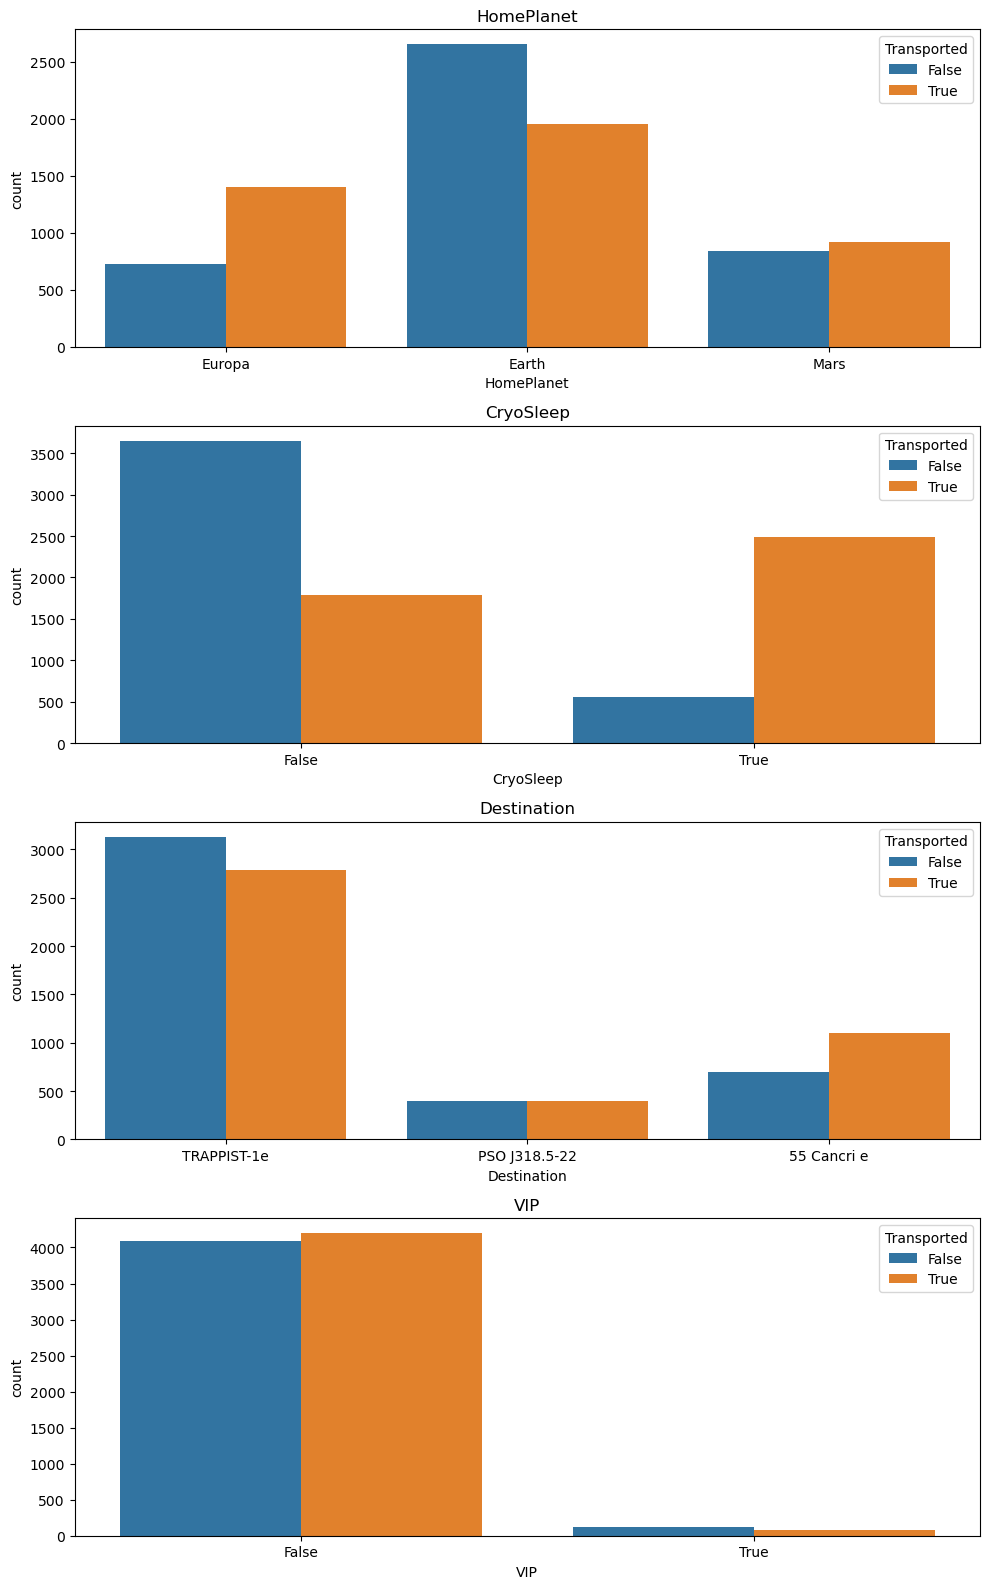

In [9]:
# Categorical features
cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(len(cat_feats), 1, i + 1)
    sns.countplot(
        data=train_data,
        x=var_name,
        axes=ax,
        hue='Transported'
    )
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

In [10]:
# Qualitative features
qual_feats = ['PassengerId', 'Cabin', 'Name']
train_data[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


### Feature Engineering

Text(0.5, 1.0, 'Age group distribution')

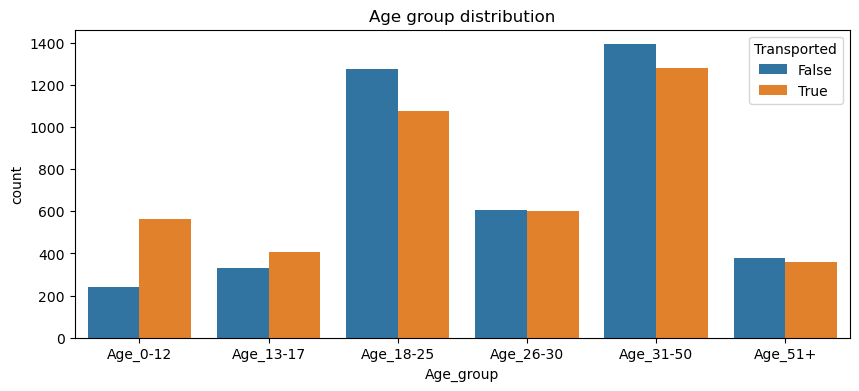

In [11]:
# Age
# New features - train set
train_data['Age_group'] = np.nan
train_data.loc[train_data['Age'] <= 12, 'Age_group'] = 'Age_0-12'
train_data.loc[(train_data['Age'] > 12) & (train_data['Age'] < 18), 'Age_group'] = 'Age_13-17'
train_data.loc[(train_data['Age'] >= 18) & (train_data['Age'] <= 25), 'Age_group'] = 'Age_18-25'
train_data.loc[(train_data['Age'] > 25) & (train_data['Age'] <= 30), 'Age_group'] = 'Age_26-30'
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 50), 'Age_group'] = 'Age_31-50'
train_data.loc[train_data['Age'] > 50, 'Age_group'] = 'Age_51+'

# New features - test set
test_data['Age_group'] = np.nan
test_data.loc[test_data['Age'] <= 12, 'Age_group'] = 'Age_0-12'
test_data.loc[(test_data['Age'] > 12) & (test_data['Age'] < 18), 'Age_group'] = 'Age_13-17'
test_data.loc[(test_data['Age'] >= 18) & (test_data['Age'] <= 25), 'Age_group'] = 'Age_18-25'
test_data.loc[(test_data['Age'] > 25) & (test_data['Age'] <= 30), 'Age_group'] = 'Age_26-30'
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 50), 'Age_group'] = 'Age_31-50'
test_data.loc[test_data['Age'] > 50, 'Age_group'] = 'Age_51+'

plt.figure(figsize=(10, 4))
g = sns.countplot(
    data=train_data,
    x='Age_group',
    hue='Transported',
    order=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+']
)
plt.title('Age group distribution')

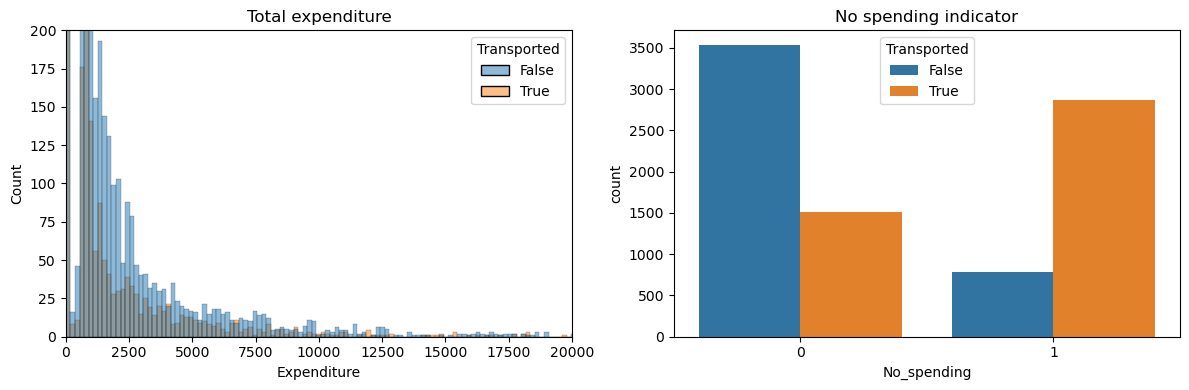

In [12]:
# Expenditure
# New features - train set
train_data['Expenditure'] = train_data[exp_feats].sum(axis=1)
train_data['No_spending'] = (train_data['Expenditure'] == 0).astype(int)

# New features - test set
test_data['Expenditure'] = test_data[exp_feats].sum(axis=1)
test_data['No_spending'] = (test_data['Expenditure'] == 0).astype(int)

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(
    data=train_data,
    x='Expenditure',
    hue='Transported',
    bins=200
)
plt.title('Total expenditure')
plt.ylim([0, 200])
plt.xlim([0, 20000])

plt.subplot(1, 2, 2)
sns.countplot(
    data=train_data,
    x='No_spending',
    hue='Transported'
)
plt.title('No spending indicator')

fig.tight_layout()
plt.show()

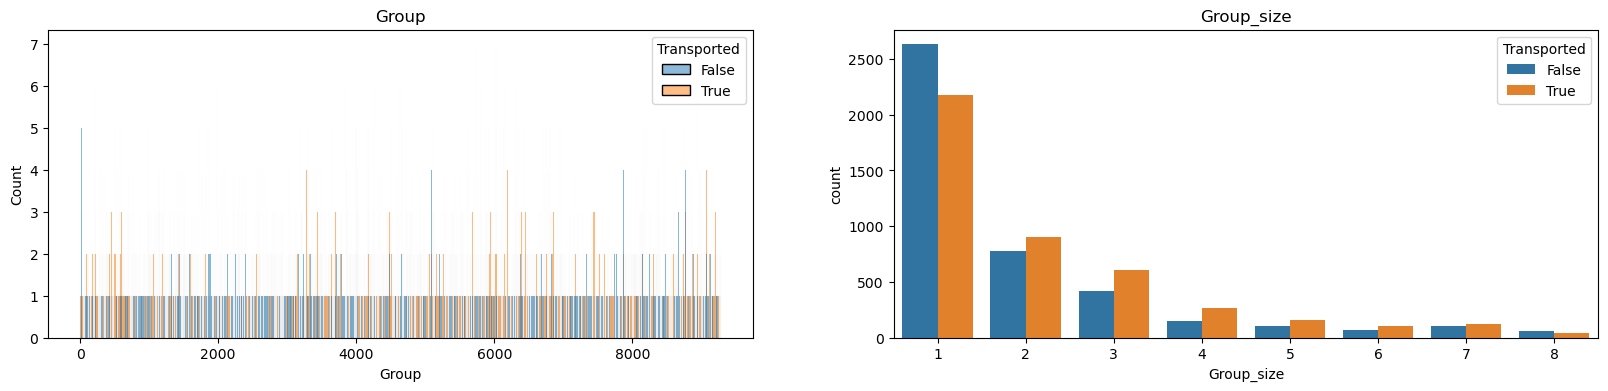

In [13]:
# Passenger group
# New feature - Group
train_data['Group'] = train_data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test_data['Group'] = test_data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train_data['Group_size'] = train_data['Group'].map(lambda x: pd.concat([train_data['Group'], test_data['Group']]).value_counts()[x])
test_data['Group_size'] = test_data['Group'].map(lambda x: pd.concat([train_data['Group'], test_data['Group']]).value_counts()[x])

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
sns.histplot(
    data=train_data,
    x='Group',
    hue='Transported',
    binwidth=1
)
plt.title('Group') # => not good...

plt.subplot(1, 2, 2)
sns.countplot(
    data=train_data,
    x='Group_size',
    hue='Transported'
)
plt.title('Group_size')

fig.tight_layout()
plt.show()

(0.0, 3000.0)

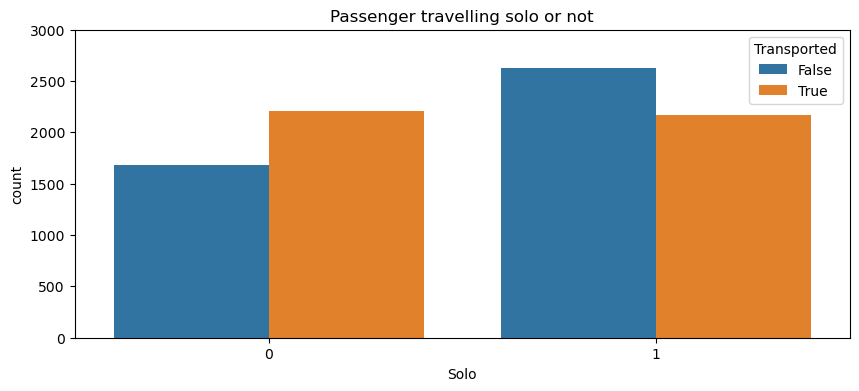

In [14]:
# Group_size
# New feature
train_data['Solo'] = (train_data['Group_size'] == 1).astype(int)
test_data['Solo'] = (test_data['Group_size'] == 1).astype(int)

plt.figure(figsize=(10, 4))
sns.countplot(
    data=train_data,
    x='Solo',
    hue='Transported'
)
plt.title('Passenger travelling solo or not')
plt.ylim([0, 3000])

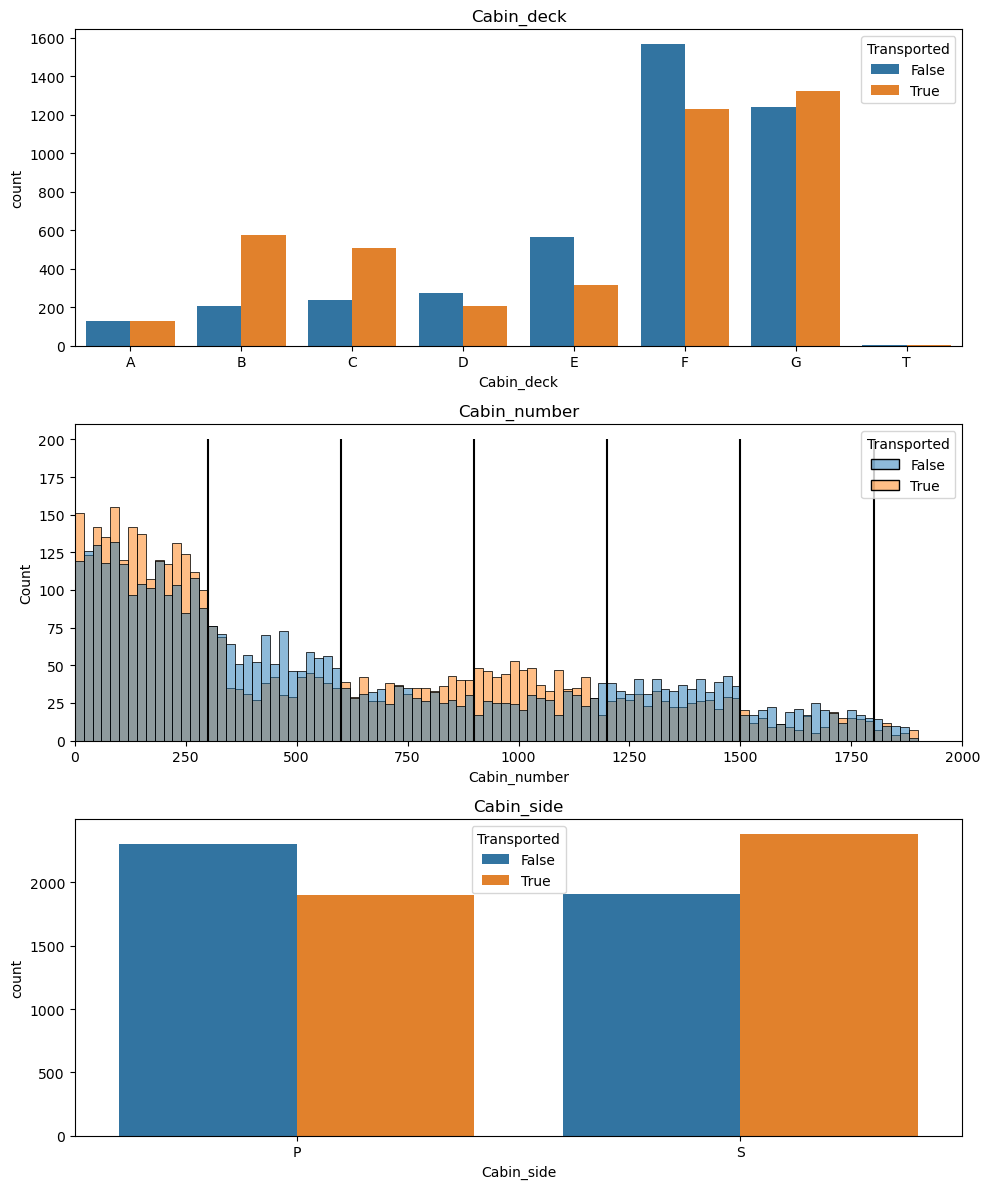

In [15]:
# Cabin location
# Replace NaN's with outliers
train_data['Cabin'].fillna('Z/9999/Z', inplace=True)
test_data['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - train set
train_data['Cabin_deck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0])
train_data['Cabin_number'] = train_data['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train_data['Cabin_side'] = train_data['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test_data['Cabin_deck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0])
test_data['Cabin_number'] = test_data['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test_data['Cabin_side'] = test_data['Cabin'].apply(lambda x: x.split('/')[2])

# Restore NaN's
train_data.loc[train_data['Cabin_deck'] == 'Z', 'Cabin_deck'] = np.nan
train_data.loc[train_data['Cabin_number'] == 9999, 'Cabin_number'] = np.nan
train_data.loc[train_data['Cabin_side'] == 'Z', 'Cabin_side'] = np.nan
test_data.loc[test_data['Cabin_deck'] == 'Z', 'Cabin_deck'] = np.nan
test_data.loc[test_data['Cabin_number'] == 9999, 'Cabin_number'] = np.nan
test_data.loc[test_data['Cabin_side'] == 'Z', 'Cabin_side'] = np.nan

fig = plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
sns.countplot(
    data=train_data,
    x='Cabin_deck',
    hue='Transported',
    order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
)
plt.title('Cabin_deck')

plt.subplot(3, 1, 2)
sns.histplot(
    data=train_data,
    x='Cabin_number',
    hue='Transported',
    binwidth=20
)
plt.vlines([300, 600, 900, 1200, 1500, 1800], ymin=0, ymax=200, color='black')
plt.title('Cabin_number')
plt.xlim([0, 2000])

plt.subplot(3, 1, 3)
sns.countplot(
    data=train_data,
    x='Cabin_side',
    hue='Transported'
)
plt.title('Cabin_side')

fig.tight_layout()
plt.show()

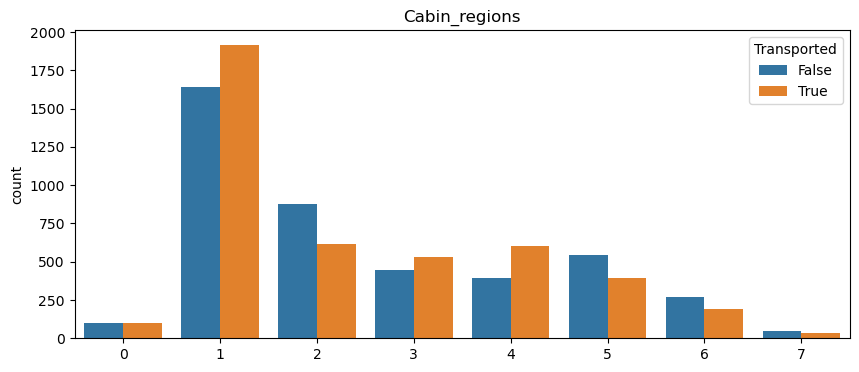

In [16]:
# Cabin location
# New features - train set
train_data['Cabin_region1'] = (train_data['Cabin_number'] < 300).astype(int)
train_data['Cabin_region2'] = ((train_data['Cabin_number'] >= 300) & (train_data['Cabin_number'] < 600)).astype(int)
train_data['Cabin_region3'] = ((train_data['Cabin_number'] >= 600) & (train_data['Cabin_number'] < 900)).astype(int)
train_data['Cabin_region4'] = ((train_data['Cabin_number'] >= 900) & (train_data['Cabin_number'] < 1200)).astype(int)
train_data['Cabin_region5'] = ((train_data['Cabin_number'] >= 1200) & (train_data['Cabin_number'] < 1500)).astype(int)
train_data['Cabin_region6'] = ((train_data['Cabin_number'] >= 1500) & (train_data['Cabin_number'] < 1800)).astype(int)
train_data['Cabin_region7'] = (train_data['Cabin_number'] >= 1800).astype(int)

# New features - test set
test_data['Cabin_region1'] = (test_data['Cabin_number'] < 300).astype(int)
test_data['Cabin_region2'] = ((test_data['Cabin_number'] >= 300) & (train_data['Cabin_number'] < 600)).astype(int)
test_data['Cabin_region3'] = ((test_data['Cabin_number'] >= 600) & (train_data['Cabin_number'] < 900)).astype(int)
test_data['Cabin_region4'] = ((test_data['Cabin_number'] >= 900) & (train_data['Cabin_number'] < 1200)).astype(int)
test_data['Cabin_region5'] = ((test_data['Cabin_number'] >= 1200) & (train_data['Cabin_number'] < 1500)).astype(int)
test_data['Cabin_region6'] = ((test_data['Cabin_number'] >= 1500) & (train_data['Cabin_number'] < 1800)).astype(int)
test_data['Cabin_region7'] = (test_data['Cabin_number'] >= 1800).astype(int)

plt.figure(figsize=(10, 4))
train_data['Cabin_temp_plot'] = (
    train_data['Cabin_region1'] +\
    train_data['Cabin_region2'] * 2 +\
    train_data['Cabin_region3'] * 3 +\
    train_data['Cabin_region4'] * 4 +\
    train_data['Cabin_region5'] * 5 +\
    train_data['Cabin_region6'] * 6 +\
    train_data['Cabin_region7'] * 7
).astype(int)

sns.countplot(
    data=train_data,
    x='Cabin_temp_plot',
    hue='Transported'
)
plt.xlabel('')
plt.title('Cabin_regions')
plt.show()

train_data.drop(columns=['Cabin_temp_plot'], inplace=True)

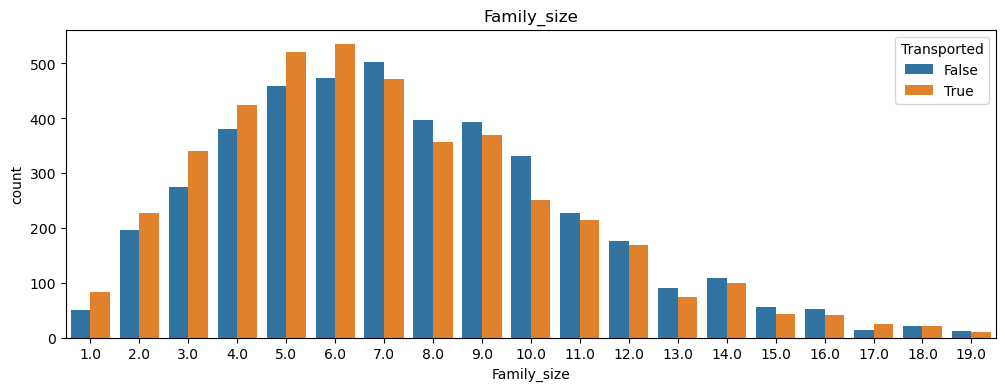

In [17]:
# Last name
# Replace NaN's with outliers
train_data['Name'].fillna('Unknown Unknown', inplace=True)
test_data['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train_data['Surname'] = train_data['Name'].apply(lambda x: x.split()[-1])
test_data['Surname'] = test_data['Name'].apply(lambda x: x.split()[-1])

# New feature - Family size
train_data['Family_size'] = train_data['Surname'].map(lambda x: pd.concat([train_data['Surname'], test_data['Surname']]).value_counts()[x])
test_data['Family_size'] = test_data['Surname'].map(lambda x: pd.concat([train_data['Surname'], test_data['Surname']]).value_counts()[x])

# Restore NaN's
train_data.loc[train_data['Surname'] == 'Unknown', 'Family_size'] = np.nan
train_data.loc[train_data['Surname'] == 'Unknown', 'Surname'] = np.nan
test_data.loc[test_data['Surname'] == 'Unknown', 'Family_size'] = np.nan
test_data.loc[test_data['Surname'] == 'Unknown', 'Surname'] = np.nan

plt.figure(figsize=(12, 4))
sns.countplot(
    data=train_data,
    x='Family_size',
    hue='Transported'
)
plt.title('Family_size')
plt.show()

### Missing Value Handling
To make filling missing values easier, we combine train and test set. We will split it back later.

In [18]:
all_data = pd.concat([train_data.drop(columns=['Transported']), test_data], axis=0).reset_index(drop=True)

              Number_missing  Percentage_missing
HomePlanet               288                2.22
CryoSleep                310                2.39
Destination              274                2.11
Age                      270                2.08
VIP                      296                2.28
RoomService              263                2.03
FoodCourt                289                2.23
ShoppingMall             306                2.36
Spa                      284                2.19
VRDeck                   268                2.07
Age_group                270                2.08
Cabin_deck               299                2.31
Cabin_number             299                2.31
Cabin_side               299                2.31
Surname                  294                2.27
Family_size              294                2.27


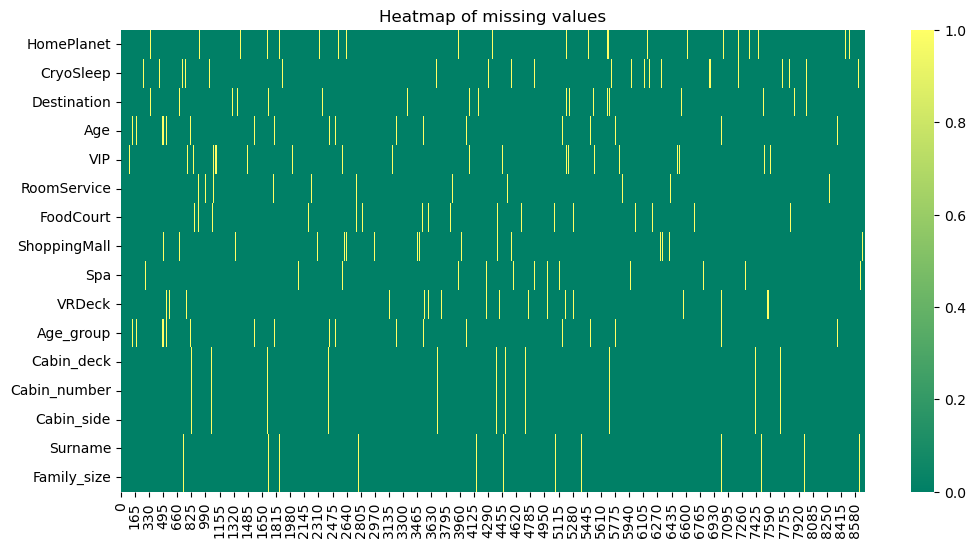

In [19]:
na_cols = all_data.columns[all_data.isna().any()].tolist()

missing = pd.DataFrame(all_data[na_cols].isna().sum(), columns=['Number_missing'])
missing['Percentage_missing'] = np.round(100 * missing['Number_missing'] / len(all_data), 2)
print(missing)

plt.figure(figsize=(12, 6))
sns.heatmap(data=train_data[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')
plt.show()

In [20]:
# HomePlanet - Group
G_HP = all_data.groupby(['Group', 'HomePlanet']).size().unstack().fillna(0)
G_HP.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


In [21]:
# HomePlanet - Group
print('All count:', len(G_HP))
print(f"Earth count: {len(G_HP[G_HP['Earth'] > 0])}")
print(f"Europa count: {len(G_HP[G_HP['Europa'] > 0])}")
print(f"Mars count: {len(G_HP[G_HP['Mars'] > 0])}")
print('Does everyone in the same group come from the same planet?',\
      len(G_HP) == len(G_HP[G_HP['Earth'] > 0]) + len(G_HP[G_HP['Europa'] > 0]) + len(G_HP[G_HP['Mars'] > 0])
)

All count: 9124
Earth count: 5380
Europa count: 1854
Mars count: 1890
Does everyone in the same group come from the same planet? True


In [22]:
# HomePlanet - Group
def get_Target_from_Key(target, key, query):
    result = all_data[all_data[key] == query][all_data[target].notna()]
    if len(result) > 0:
        return result[target].iloc[0]
    else:
        return np.nan

get_Target_from_Key('HomePlanet', 'Group', 1), get_Target_from_Key('HomePlanet', 'Group', 251)

('Europa', nan)

In [23]:
# HomePlanet - Group
# Missing values before
HP_null_before = all_data['HomePlanet'].isna().sum()

# Filling missing values
all_data['HomePlanet'][all_data['HomePlanet'].isna()] = all_data['Group'][all_data['HomePlanet'].isna()].apply(lambda x: get_Target_from_Key('HomePlanet', 'Group', x))

print('#HomePlanet missing values before:', HP_null_before)
print('#HomePlanet missing values after:', all_data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


<AxesSubplot:xlabel='Cabin_deck', ylabel='HomePlanet'>

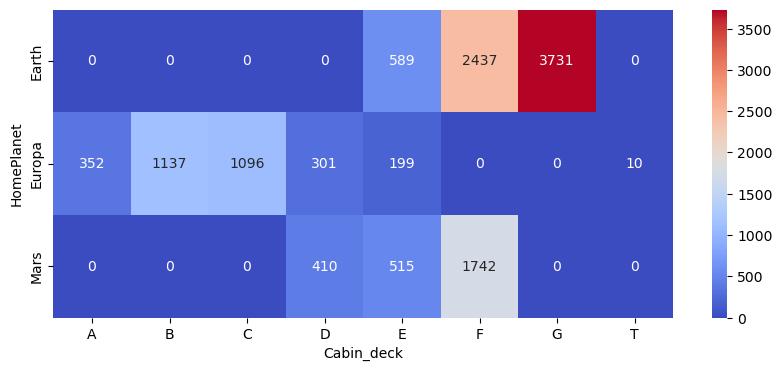

In [24]:
# HomePlanet - Cabin_deck
Cabin_HP = all_data.groupby(['Cabin_deck', 'HomePlanet']).size().unstack().fillna(0)

plt.figure(figsize=(10, 4))
sns.heatmap(
    data=Cabin_HP.T,
    annot=True,
    fmt='g',
    cmap='coolwarm'
)

In [25]:
# HomePlanet - Cabin_deck
# Missing values before
HP_null_before = all_data['HomePlanet'].isna().sum()

# Filling values
all_data['HomePlanet'][all_data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])] = 'Europa'
all_data['HomePlanet'][all_data['Cabin_deck'] == 'G'] = 'Earth'

print('#HomePlanet missing values before:', HP_null_before)
print('#HomePlanet missing values after:', all_data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


Text(0.5, 1.0, 'Number of unique planets per surname')

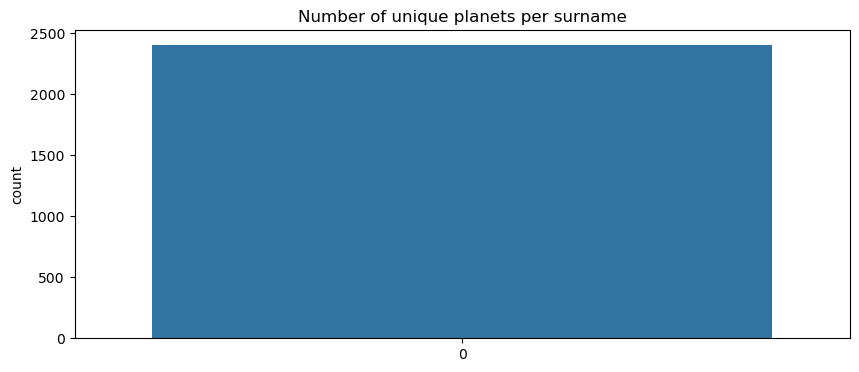

In [26]:
# HomePlanet - Surname
S_HP = all_data.groupby(['Surname', 'HomePlanet']).size().unstack().fillna(0)

plt.figure(figsize=(10, 4))
sns.countplot(data=(S_HP > 0).sum(axis=1))
plt.title('Number of unique planets per surname')

In [27]:
# HomePlanet - Surname
# Missing values before
HP_null_before = all_data['HomePlanet'].isna().sum()

# Filling missing values
all_data['HomePlanet'][all_data['HomePlanet'].isna()] = all_data['Surname'][all_data['HomePlanet'].isna()].apply(lambda x: get_Target_from_Key('HomePlanet', 'Surname', x))

print('#HomePlanet missing values before:', HP_null_before)
print('#HomePlanet missing values after:', all_data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


<AxesSubplot:xlabel='HomePlanet', ylabel='Destination'>

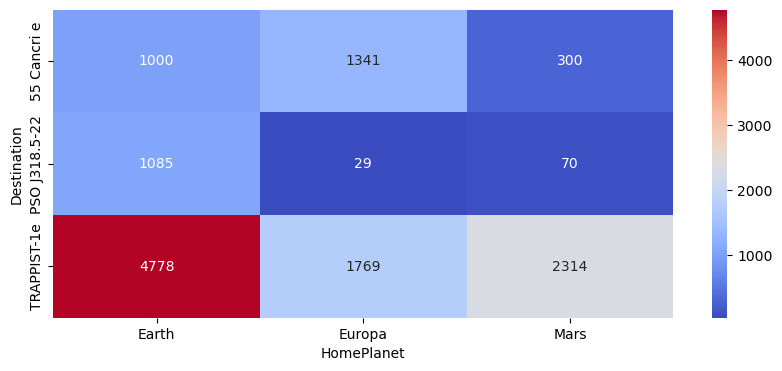

In [28]:
# HomePlanet - Destination
D_HP = all_data.groupby(['Destination', 'HomePlanet']).size().unstack().fillna(0)

plt.figure(figsize=(10, 4))
sns.heatmap(
    data=D_HP,
    annot=True,
    fmt='g',
    cmap='coolwarm'
)

In [29]:
# HomePlanet - Destination
# Missing values before
HP_null_before = all_data['HomePlanet'].isna().sum()

# Filling values
all_data.loc[(all_data['Cabin_deck'] != 'D') & (all_data['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'
all_data.loc[(all_data['Cabin_deck'] == 'D') & (all_data['HomePlanet'].isna()), 'HomePlanet'] = 'Mars'

print('#HomePlanet missing values before:', HP_null_before)
print('#HomePlanet missing values after:', all_data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


In [30]:
# Destination
print(train_data['Destination'].value_counts())

# Missing values before
D_null_before = all_data['Destination'].isna().sum()

# Filling values
all_data.loc[all_data['Destination'].isna(), 'Destination'] = 'TRAPPIST-1e'

print('#Destination missing values before:', D_null_before)
print('#Destination missing values after:', all_data['Destination'].isna().sum())

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
#Destination missing values before: 274
#Destination missing values after: 0


Text(0.5, 1.0, '# of Unique cabin decks per group')

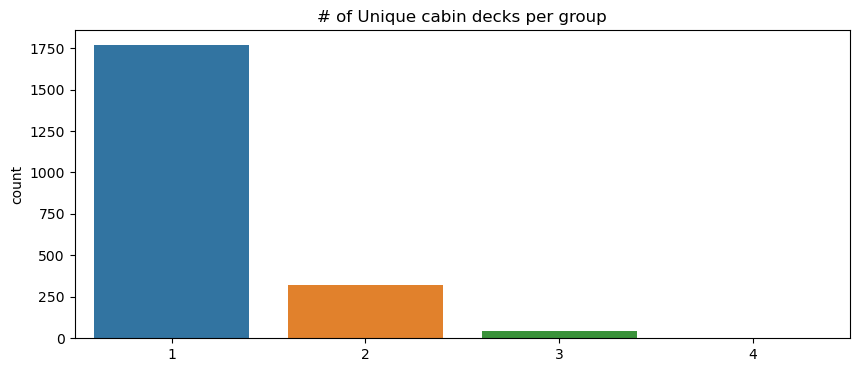

In [31]:
# Surname - Group
G_S = all_data[all_data['Group_size'] > 1].groupby(['Group', 'Surname']).size().unstack().fillna(0)

plt.figure(figsize=(10, 4))
sns.countplot(x=(G_S > 0).sum(axis=1))
plt.title('# of Unique cabin decks per group')

In [32]:
# Surname - Group
# Missing values before
Sur_null_before = all_data['Surname'].isna().sum()

# Filling values
all_data['Surname'][all_data['Surname'].isna()] = all_data['Group'][all_data['Surname'].isna()].apply(lambda x: get_Target_from_Key('Surname', 'Group', x))

print('#Surname missing values before:', Sur_null_before)
print('#Surname missing values after:', all_data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


In [33]:
# Surname
# Replace NaN's with outliers
all_data['Surname'].fillna('Unk', inplace=True)

# Update family size feature
all_data['Family_size'] = all_data['Surname'].apply(lambda x: all_data['Surname'].value_counts()[x])
all_data.loc[all_data['Surname'] == 'Unk', 'Family_size'] = 0

# Restore NaN's
all_data.loc[all_data['Surname'] == 'Unk', 'Surname'] = np.nan


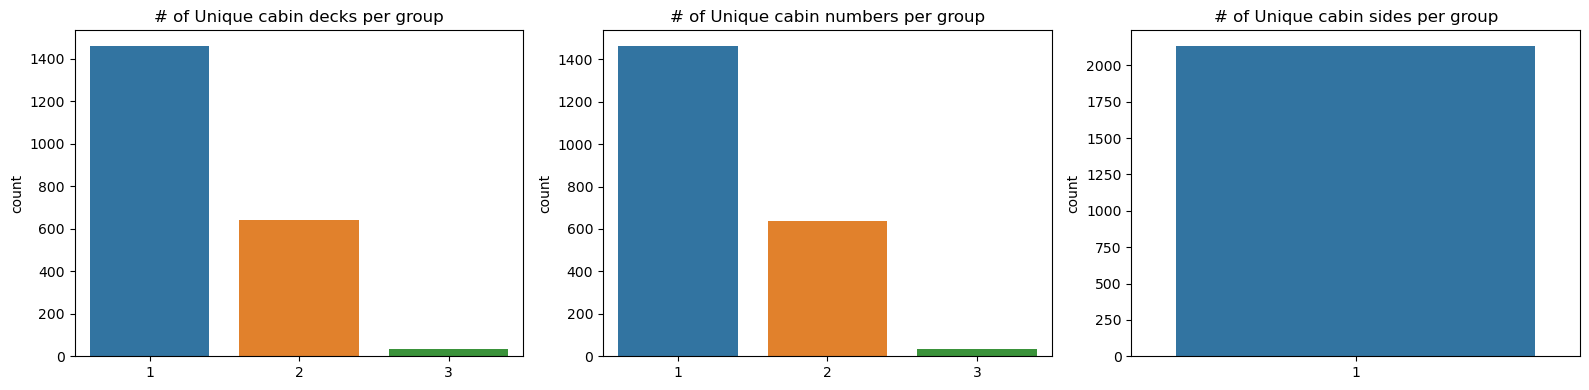

In [34]:
# Cabin_side - Group
G_CD = all_data[all_data['Group_size'] > 1].groupby(['Group', 'Cabin_deck']).size().unstack().fillna(0)
G_CN = all_data[all_data['Group_size'] > 1].groupby(['Group', 'Cabin_number']).size().unstack().fillna(0)
G_CS = all_data[all_data['Group_size'] > 1].groupby(['Group', 'Cabin_side']).size().unstack().fillna(0)

fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.countplot(x=(G_CD > 0).sum(axis=1))
plt.title('# of Unique cabin decks per group')

plt.subplot(1, 3, 2)
sns.countplot(x=(G_CN > 0).sum(axis=1))
plt.title('# of Unique cabin numbers per group')

plt.subplot(1, 3, 3)
sns.countplot(x=(G_CS > 0).sum(axis=1))
plt.title('# of Unique cabin sides per group')

fig.tight_layout()
plt.show()

In [35]:
# Cabin_side - Group
# Missing values before
CS_null_before = all_data['Cabin_side'].isna().sum()

# Filling values
all_data.loc[all_data['Cabin_side'].isna(), 'Cabin_side'] = all_data['Group'][all_data['Cabin_side'].isna()].apply(lambda x: get_Target_from_Key('Cabin_side', 'Group', x))

print('#Cabin_side missing values before:', CS_null_before)
print('#Cabin_side missing values after:', all_data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


Text(0.5, 1.0, 'Ratio of cabin side by surname')

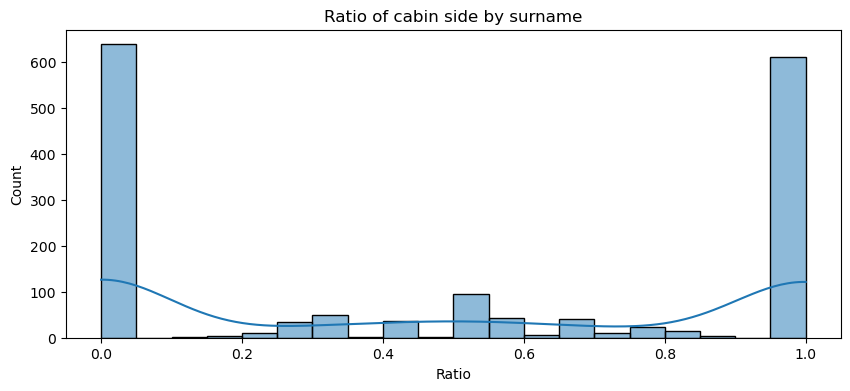

In [36]:
# Cabin_side - Surname
S_CS = all_data[all_data['Group_size'] > 1].groupby(['Surname', 'Cabin_side']).size().unstack().fillna(0)

S_CS['Ratio'] = S_CS['P'] / (S_CS['P'] + S_CS['S'])

plt.figure(figsize=(10, 4))
sns.histplot(
    data=S_CS['Ratio'],
    kde=True,
    binwidth=0.05
)
plt.title('Ratio of cabin side by surname')

In [37]:
# Cabin_side - Surname
# Missing values before
CS_null_before = all_data['Cabin_side'].isna().sum()

# Filling values
all_data.loc[all_data['Cabin_side'].isna(), 'Cabin_side'] = all_data['Surname'][all_data['Cabin_side'].isna()].apply(lambda x: get_Target_from_Key('Cabin_side', 'Surname', x))

print('#Cabin_side missing values before:', CS_null_before)
print('#Cabin_side missing values after:', all_data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 162
#Cabin_side missing values after: 5


In [38]:
# Cabin_side - Surname
# Missing values before
CS_null_before = all_data['Cabin_side'].isna().sum()

# Filling values
all_data.loc[all_data['Cabin_side'].isna(), 'Cabin_side'] = 'Z'

print('#Cabin_side missing values before:', CS_null_before)
print('#Cabin_side missing values after:', all_data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 5
#Cabin_side missing values after: 0


In [39]:
# Cabin_deck - Group
# Missing values before
CD_null_before = all_data['Cabin_deck'].isna().sum()

# Filling values
all_data.loc[all_data['Cabin_deck'].isna(), 'Cabin_deck'] = all_data['Group'][all_data['Cabin_deck'].isna()].apply(lambda x: get_Target_from_Key('Cabin_deck', 'Group', x))

print('#Cabin_deck missing values before:', CD_null_before)
print('#Cabin_deck missing values after:', all_data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 162


In [40]:
# Cabin_deck - HomePlanet
all_data.groupby(['HomePlanet', 'Destination', 'Solo', 'Cabin_deck']).size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    89.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   19.0    68.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   439.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  220.0   797.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      273.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      228.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1074.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

In [41]:
# Cabin_deck - HomePlanet => Mars: F, Europa: C, Earth: G
# Missing values before
CD_null_before = all_data['Cabin_deck'].isna().sum()

# Filling values
all_data.loc[(all_data['Cabin_deck'].isna()) & (all_data['HomePlanet'] == 'Earth'), 'Cabin_deck'] = 'G'
all_data.loc[(all_data['Cabin_deck'].isna()) & (all_data['HomePlanet'] == 'Mars'), 'Cabin_deck'] = 'F'
all_data.loc[(all_data['Cabin_deck'].isna()) & (all_data['HomePlanet'] == 'Europa'), 'Cabin_deck'] = 'F'

print('#Cabin_deck missing values before:', CD_null_before)
print('#Cabin_deck missing values after:', all_data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 0


Text(0.5, 1.0, 'Cabin_number vs group (colored by Cabin_deck)')

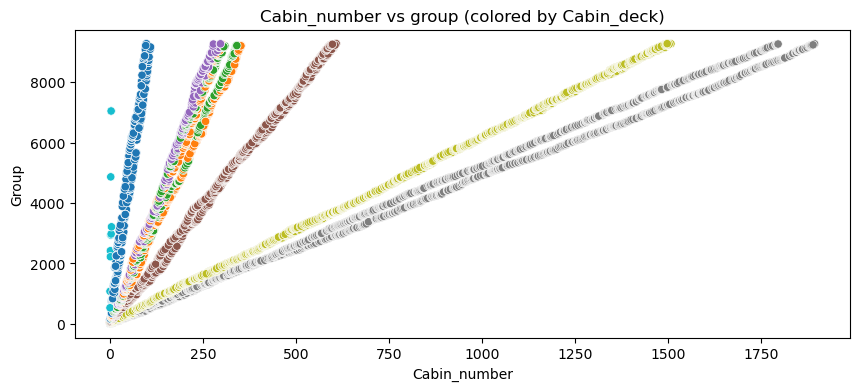

In [42]:
# Cabin_number - Cabin_deck, Group

plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=all_data,
    x='Cabin_number',
    y='Group',
    c=LabelEncoder().fit_transform(all_data['Cabin_deck'][all_data['Cabin_number'].notna()]),
    cmap='tab10'
)

plt.title('Cabin_number vs group (colored by Cabin_deck)')

In [43]:
# Cabin_number - Cabin_deck, Group
# Missing values before
CN_null_before = all_data['Cabin_number'].isna().sum()

# Filling values
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    model_CN = LinearRegression()
    model_CN.fit(
        X=all_data[all_data['Cabin_number'].notna()][all_data['Cabin_deck'] == deck]['Group'].to_numpy().reshape(-1, 1),
        y=all_data[all_data['Cabin_number'].notna()][all_data['Cabin_deck'] == deck]['Cabin_number'].to_numpy()
    )
    preds_CN = model_CN.predict(all_data[all_data['Cabin_number'].isna()][all_data['Cabin_deck'] == deck]['Group'].to_numpy().reshape(-1, 1))

    all_data.loc[(all_data['Cabin_number'].isna()) & (all_data['Cabin_deck'] == deck), 'Cabin_number'] = preds_CN.astype(int)

print('#Cabin_number missing values before:', CN_null_before)
print('#Cabin_number missing values after:', all_data['Cabin_number'].isna().sum())

#Cabin_number missing values before: 299
#Cabin_number missing values after: 0


In [44]:
# Update Cabin_regions
all_data['Cabin_region1'] = (all_data['Cabin_number'] < 300).astype(int)
all_data['Cabin_region2'] = ((all_data['Cabin_number'] >= 300) & (all_data['Cabin_number'] < 600)).astype(int)
all_data['Cabin_region3'] = ((all_data['Cabin_number'] >= 600) & (all_data['Cabin_number'] < 900)).astype(int)
all_data['Cabin_region4'] = ((all_data['Cabin_number'] >= 900) & (all_data['Cabin_number'] < 1200)).astype(int)
all_data['Cabin_region5'] = ((all_data['Cabin_number'] >= 1200) & (all_data['Cabin_number'] < 1500)).astype(int)
all_data['Cabin_region6'] = ((all_data['Cabin_number'] >= 1500) & (all_data['Cabin_number'] < 1800)).astype(int)
all_data['Cabin_region7'] = (all_data['Cabin_number'] >= 1800).astype(int)

### Optional
You can try more filling missing values. See this [ref](https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#Libraries)
<hr>

At below, NaNs were filled with most frequent values.

In [45]:
all_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin              0
Destination        0
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name               0
Age_group        270
Expenditure        0
No_spending        0
Group              0
Group_size         0
Solo               0
Cabin_deck         0
Cabin_number       0
Cabin_side         0
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
Surname          155
Family_size        0
dtype: int64

In [46]:
print(all_data['CryoSleep'].value_counts())
all_data['CryoSleep'] = all_data['CryoSleep'].fillna(False)

False    8079
True     4581
Name: CryoSleep, dtype: int64


In [47]:
print(all_data['Age'].mode())
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mode()[0])
all_data.loc[all_data['Age_group'].isna(), 'Age_group'] = 'Age_18-25'
all_data[['Age', 'Age_group']]

0    18.0
Name: Age, dtype: float64


,Age,Age_group
0,39.0,Age_31-50
1,24.0,Age_18-25
2,58.0,Age_51+
3,33.0,Age_31-50
4,16.0,Age_13-17
...,...,...
12965,34.0,Age_31-50
12966,42.0,Age_31-50
12967,18.0,Age_18-25
12968,18.0,Age_18-25


In [48]:
print(all_data['VIP'].value_counts())
all_data['VIP'] = all_data['VIP'].fillna(False)

False    12401
True       273
Name: VIP, dtype: int64


In [49]:
print(all_data['RoomService'].value_counts())
all_data['RoomService'] = all_data['RoomService'].fillna(0.0)

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64


In [50]:
print(all_data['FoodCourt'].value_counts())
all_data['FoodCourt'] = all_data['FoodCourt'].fillna(0.0)

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64


In [51]:
print(all_data['ShoppingMall'].value_counts())
all_data['ShoppingMall'] = all_data['ShoppingMall'].fillna(0.0)

0.0       8331
1.0        225
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: ShoppingMall, Length: 1367, dtype: int64


In [52]:
print(all_data['Spa'].value_counts())
all_data['Spa'] = all_data['Spa'].fillna(0.0)

0.0       7935
1.0        218
2.0        148
3.0         82
4.0         73
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: Spa, Length: 1679, dtype: int64


In [53]:
print(all_data['VRDeck'].value_counts())
all_data['VRDeck'] = all_data['VRDeck'].fillna(0.0)

0.0       8252
1.0        211
2.0        108
3.0         89
5.0         68
          ... 
395.0        1
3186.0       1
2519.0       1
1652.0       1
494.0        1
Name: VRDeck, Length: 1642, dtype: int64


In [54]:
all_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Age_group          0
Expenditure        0
No_spending        0
Group              0
Group_size         0
Solo               0
Cabin_deck         0
Cabin_number       0
Cabin_side         0
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
Surname          155
Family_size        0
dtype: int64

### Preprocessing

In [55]:
# Train set and Test set
X_train = all_data[all_data['PassengerId'].isin(train_data['PassengerId'].values)].copy()
X_test = all_data[all_data['PassengerId'].isin(test_data['PassengerId'].values)].copy()
X_train.shape, X_test.shape

((8693, 31), (4277, 31))

In [56]:
# Drop features
X_train.drop(columns=['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin', 'Cabin_number', 'Surname', 'Name'], inplace=True)
X_test.drop(columns=['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin', 'Cabin_number', 'Surname', 'Name'], inplace=True)

X_train.shape, X_test.shape

((8693, 23), (4277, 23))

### Log transform

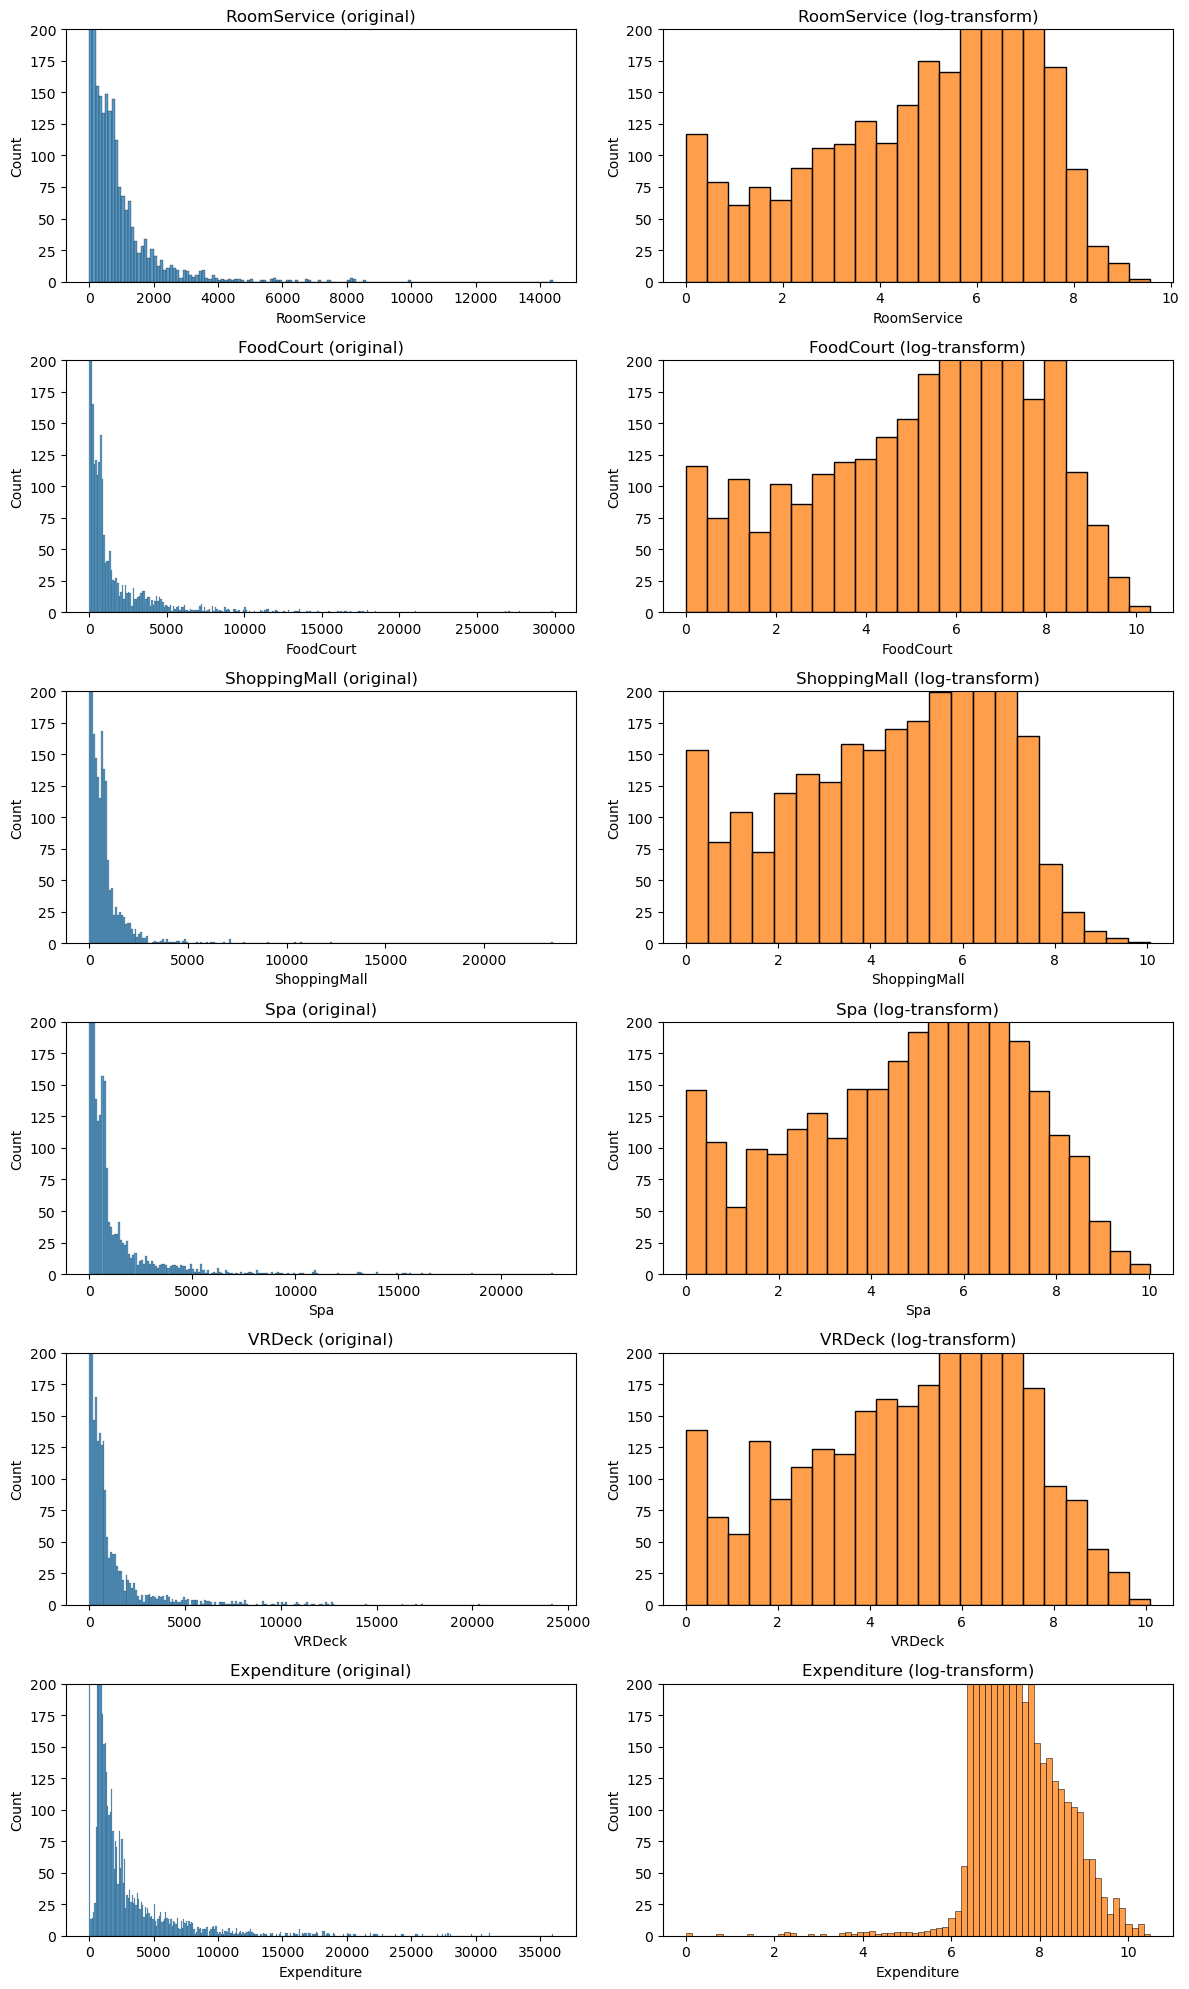

In [57]:
fig = plt.figure(figsize=(12, 20))
log_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
for i, col in enumerate(log_features):
    plt.subplot(len(log_features), 2, 2 * i + 1)
    sns.histplot(data=X_train[col], binwidth=100)
    plt.ylim([0, 200])
    plt.title(f'{col} (original)')

    plt.subplot(len(log_features), 2, 2 * i + 2)
    sns.histplot(data=np.log(X_train[col]), color='C1')
    plt.ylim([0, 200])
    plt.title(f'{col} (log-transform)')

fig.tight_layout()
plt.show()

In [58]:
for col in log_features:
    X_train[col] = np.log(1 + X_train[col])
    X_test[col] = np.log(1 + X_test[col])

X_train.shape, X_test.shape

((8693, 23), (4277, 23))

### Encoding and scaling

In [59]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(
        drop='if_binary',
        handle_unknown='ignore',
        sparse=False
    ))]
)

ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

print(X_train.shape, X_test.shape)

(8693, 36) (4277, 36)


### PCA

In [60]:
pca = PCA(n_components=3)
components = pca.fit_transform(X_train)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    data_frame=components,
    x=0,
    y=1,
    z=2,
    color=train_data['Transported'].to_numpy(),
    size=0.1 * np.ones(len(X_train)),
    opacity=1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=500,
    height=400
)

fig.show()

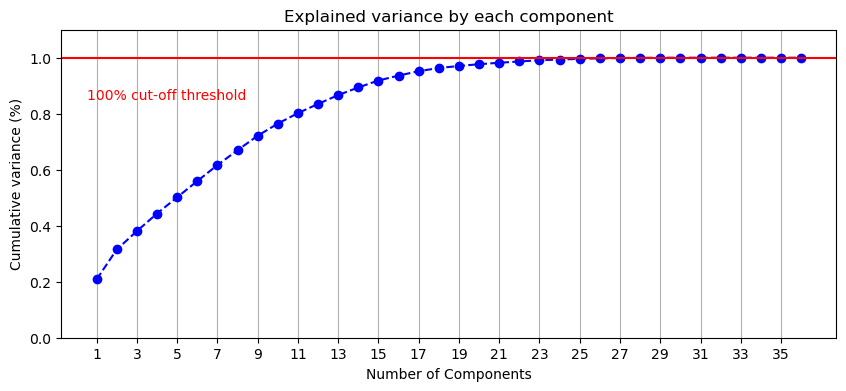

In [61]:
pca = PCA().fit(X_train)
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(
    np.arange(1, 1 + X_train.shape[1], step=1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='--',
    color='b'
)

plt.ylim([0.0, 1.1])
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1 + X_train.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(
    x=0.5,
    y=0.85,
    s='100% cut-off threshold',
    color='r'
)
ax.grid(axis='x')

### Create a validation set

In [62]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train,
#     train_data['Transported'].to_numpy().astype(int),
#     stratify=train_data['Transported'].to_numpy().astype(int),
#     test_size=0.2,
#     random_state=42
# )
# X_train.shape, X_val.shape, y_train.shape, y_val.shape
y_train = train_data['Transported'].to_numpy().astype(int)

### Model selection

In [63]:
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'), # takes long time
    'CatBoost': CatBoostClassifier(verbose=False),
    'NaiveBayes': GaussianNB()
}

# Grid search
LR_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'max_iter': [50, 100, 150]
}
KNN_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2]
}
SVC_grid = {
    'C': [0.25, 0.5, 1, 2.5, 5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
RF_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [4, 6, 8, 10, 12]
}
boosted_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.05, 0.1, 0.15]
}
NB_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]
}

grids = {
    'LogisticRegression': LR_grid,
    'KNN': KNN_grid,
    'SVC': SVC_grid,
    'RandomForest': RF_grid,
    'XGBoost': boosted_grid,
    'CatBoost': boosted_grid,
    'NaiveBayes': NB_grid
}

In [64]:
# define cross_validation Fold
n_fold = 10
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)

In [65]:
# Parameter study with/without kfold
clf_best_params = classifiers.copy()
valid_scores = pd.DataFrame({
    'Classifier': classifiers.keys(),
    'Validation accuracy': np.zeros(len(classifiers)),
    'Training time': np.zeros(len(classifiers))
})

for i, (key, classifier) in tqdm(enumerate(classifiers.items()), total=len(classifiers.keys())):
    start_time = time.time()

    clf = GridSearchCV(
        estimator=classifier,
        param_grid=grids[key],
        n_jobs=-1,
        cv=cv
    )

    clf.fit(X_train, y_train)
    valid_scores.iloc[i, 1] = clf.best_score_

    clf_best_params[key] = clf.best_params_

    end_time = time.time()
    valid_scores.iloc[i, 2] = np.round((end_time - start_time) / 60, 2)

for i, (key, classifier) in enumerate(classifiers.items()):
    print(f"Model {key} training time(min): {valid_scores.iloc[i, 2]}")


  0%|          | 0/7 [00:00<?, ?it/s]/Users/tglim/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tglim/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

Model LogisticRegression training time(min): 0.03
Model KNN training time(min): 0.02
Model SVC training time(min): 5.25
Model RandomForest training time(min): 0.46
Model XGBoost training time(min): 1.68
Model CatBoost training time(min): 3.6
Model NaiveBayes training time(min): 0.0


In [66]:
valid_scores

,Classifier,Validation accuracy,Training time
0,LogisticRegression,0.776022,0.03
1,KNN,0.776483,0.02
2,SVC,0.804323,5.25
3,RandomForest,0.805357,0.46
4,XGBoost,0.810881,1.68
5,CatBoost,0.813756,3.60
6,NaiveBayes,0.721147,0.00


In [67]:
clf_best_params

{'LogisticRegression': {'C': 0.25, 'max_iter': 100, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10, 'n_estimators': 150},
 'XGBoost': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150},
 'NaiveBayes': {'var_smoothing': 1e-07}}

In [77]:
best_classifiers = {
    # 'LogisticRegression': LogisticRegression(**clf_best_params['LogisticRegression']),
    # 'KNN': KNeighborsClassifier(**clf_best_params['KNN']),
    'SVC': SVC(**clf_best_params['SVC'], probability=True),
    'RandomForest': RandomForestClassifier(**clf_best_params['RandomForest']),
    'XGBoost': XGBClassifier(**clf_best_params['XGBoost'], use_label_encoder=False, eval_metric='logloss'), # takes long time
    'CatBoost': CatBoostClassifier(**clf_best_params['CatBoost'], verbose=False),
    # 'NaiveBayes': GaussianNB(**clf_best_params['NaiveBayes'])
}

In [78]:
preds = np.zeros(len(X_test))
for key, classifier in best_classifiers.items():
    print('Start', key)
    start = time.time()

    score=0
    for fold, (train_idx, val_idx) in tqdm(enumerate(cv.split(X_train, y_train)), desc=key, total=n_fold):
        X_train_small, X_val_small = X_train[train_idx], X_train[val_idx]
        y_train_small, y_val_small = y_train[train_idx], y_train[val_idx]

        classifier.fit(X_train_small, y_train_small)

        preds += classifier.predict_proba(X_test)[:, 1]
        score += classifier.score(X_val_small, y_val_small)

    score = score / n_fold

    stop = time.time()

    print('Model:', key)
    print('Average validation accuracy:', np.round(100 * score, 2))
    print('Training time (mins):', np.round((stop - start) / 60, 2))
    print('')

preds = preds / (n_fold * len(best_classifiers))

Start SVC


SVC: 100%|██████████| 10/10 [01:20<00:00,  8.06s/it]


Model: SVC
Average validation accuracy: 80.43
Training time (mins): 1.34

Start RandomForest


RandomForest: 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


Model: RandomForest
Average validation accuracy: 80.77
Training time (mins): 0.14

Start XGBoost


XGBoost: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


Model: XGBoost
Average validation accuracy: 81.09
Training time (mins): 0.07

Start CatBoost


CatBoost: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]

Model: CatBoost
Average validation accuracy: 81.38
Training time (mins): 0.08



### Submission

In [79]:
submission_df = pd.read_csv("../data/Space Titanic/sample_submission.csv")
submission_df['Transported'] = np.where(preds > 0.5, True, False)
submission_df.to_csv("../submissions/space-titanic/submission_SVC-RF-XGB-CB_final.csv", index=False)